In [98]:
%load_ext autoreload 
%autoreload 2
from jimFisher.Fisher import FisherSamples
import matplotlib.pyplot as plt
import corner
import numpy as np
from jimFisher.utils import LABELS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
fisher = FisherSamples(name="CE", fmin = 20, fmax = 1024, sensitivity="CE", location="H1", duration=8, 
                  trigger_time=562678816.12345678,
                waveform="IMRPhenomD", f_ref=20.0)

In [106]:
true_params = {"logM_c": np.log(49), "q": 0.5, "s1_z": 0.1, "s2_z":0.1, 
              "logdL": np.log(2000), "phase_c": 0.2, "cos_iota": 0.5, "ra": 1.1,
              "sin_dec": np.sin(0.1), 'psi': 0.3, "t_c": 0.0, "s1_x": 0.0, "s1_y":0.0, "s2_x": 0.0, "s2_y": 0.0}

In [107]:
fisher.set_at_true(true_params)

In [108]:
fisher.set_observed_properties(max_iterations=100)

  7%|▋         | 7/100 [00:20<04:37,  2.99s/it]


Converged after 7 iterations


In [109]:
observed_samples = fisher.draw_physical_samples(10000)

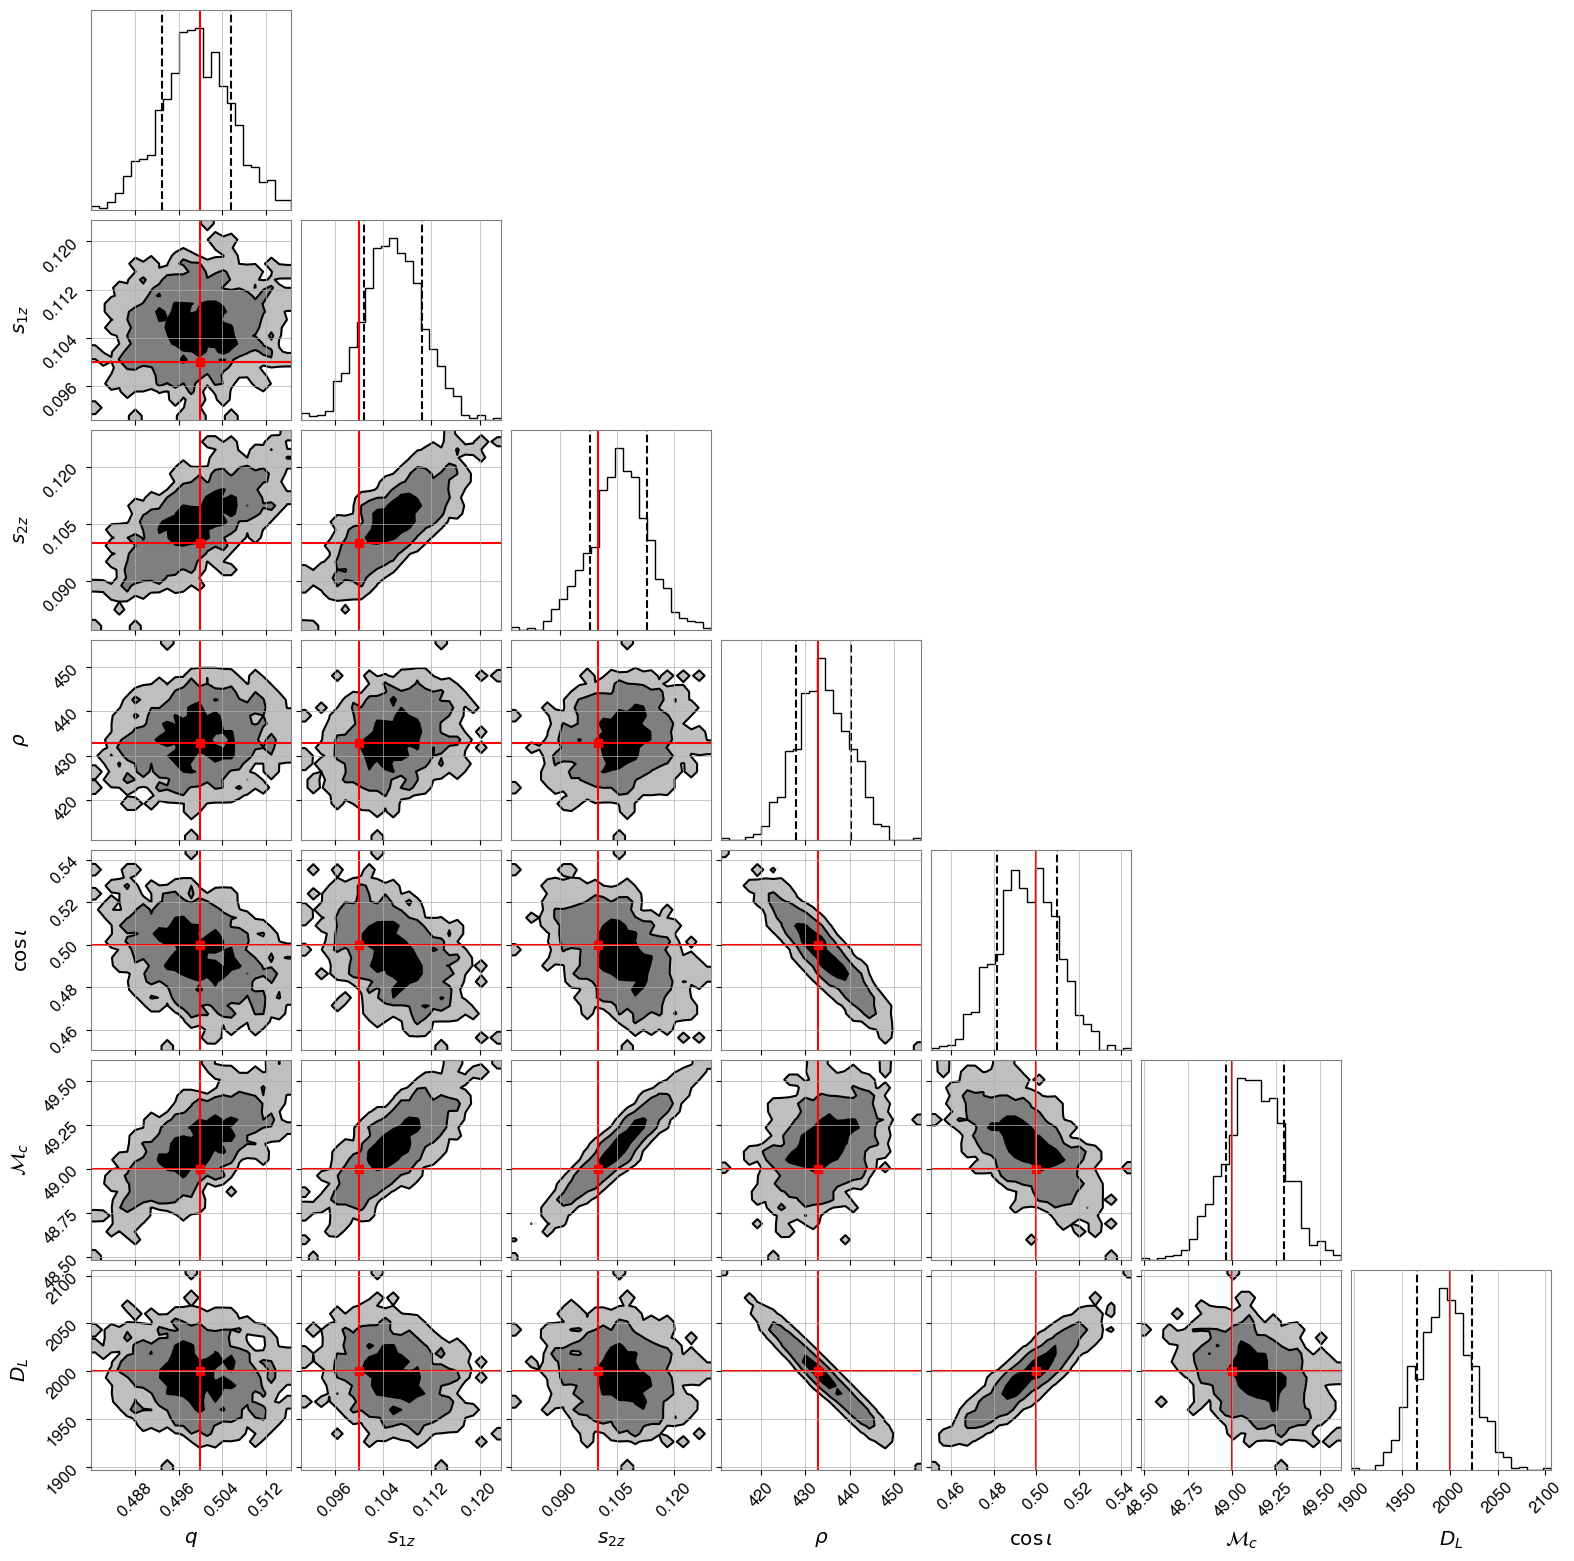

In [110]:
corner_kwargs = dict(
    bins=25, smooth=0.5,
    title_kwargs=dict(fontsize=16), 
    truth_color='r', quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=True, plot_datapoints=True, fill_contours=True,
)

corner.corner(observed_samples, truths=[fisher.true_parameters[key] for key in observed_samples],
              labels=[LABELS[key] for key in observed_samples], **corner_kwargs)